<a href="https://colab.research.google.com/github/khalit7/Computer_Vision_Models_Analysis/blob/main/Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [1]:
!pip install torchviz

  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4150 sha256=1bb9f695428a1a43b6fc270a94e3707ae7644ee677a15c87306d840429c9c342
  Stored in directory: /root/.cache/pip/wheels/04/38/f5/dc4f85c3909051823df49901e72015d2d750bd26b086480ec2
Successfully built torchviz


In [2]:
import os
import math

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import DataLoader,Dataset,random_split

import torchvision
from torchvision import transforms
import torchvision.models as models
from torchvision.utils import make_grid
from torchsummary import summary
from sklearn.metrics import accuracy_score
from PIL import Image
#from torchviz import make_dot
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

#Dataset

In [3]:
BATCH_SIZE=128

In [4]:
def visualize_data(data_loader,num_examples = BATCH_SIZE ):
  for images,labels in data_loader:
    print('images.shape:', images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    break


## MNIST

In [5]:
MNIST_data =   torchvision.datasets.MNIST('.', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ]))
MNIST_data_loader = torch.utils.data.DataLoader(MNIST_data,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)
len(MNIST_data_loader)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



469

In [6]:
MNIST_classes = MNIST_data.classes
MNIST_classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

images.shape: torch.Size([128, 1, 28, 28])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


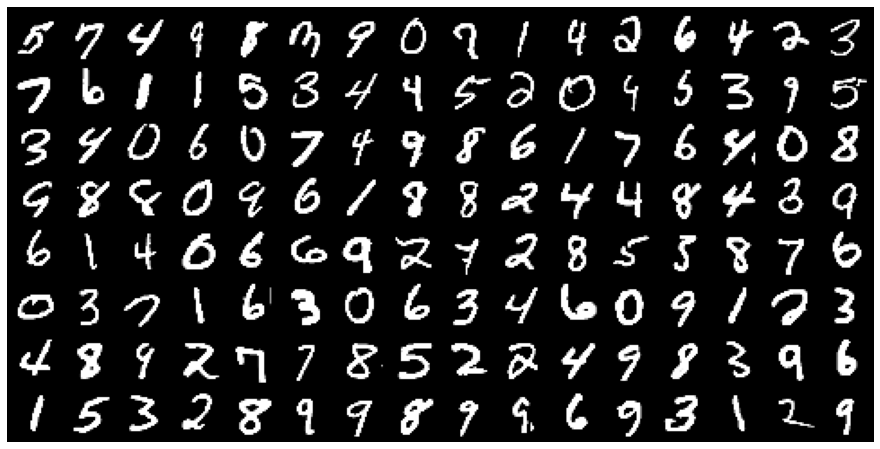

In [7]:
visualize_data(MNIST_data_loader)

## CIFAR

In [8]:
CIFAR_data =   torchvision.datasets.CIFAR10('.', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                             ]))
CIFAR_data_loader = torch.utils.data.DataLoader(CIFAR_data,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)
print(len(CIFAR_data_loader))

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./cifar-10-python.tar.gz to .
391


In [9]:
CIFAR_classes = CIFAR_data.classes
CIFAR_classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

images.shape: torch.Size([128, 3, 32, 32])


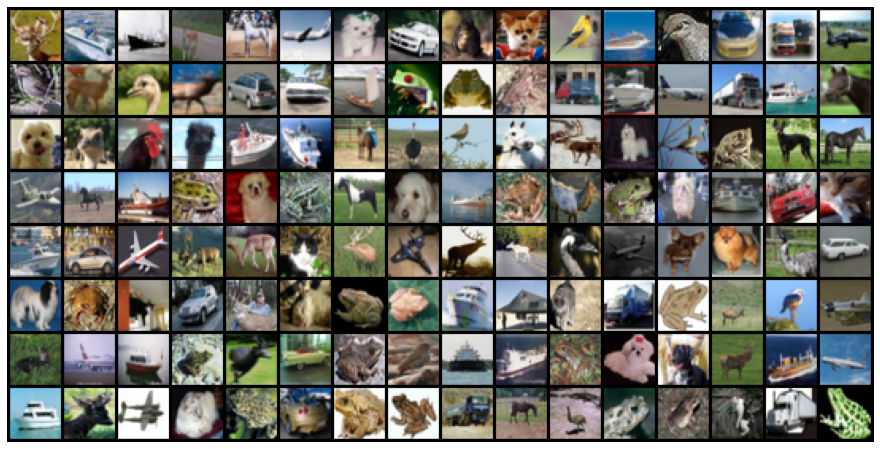

In [10]:
visualize_data(CIFAR_data_loader)

#Models

In [14]:
# random input to test models if needed 
input = torch.rand(2,3,224,224).to(device)
print(input.dtype)
print(input.shape)

torch.float32
torch.Size([2, 3, 224, 224])


## VGG

## ResNet

In [ ]:
resnet = models.resnet34(num_classes=10).to(device)

## GoogleNet

In [4]:
googlenet = models.googlenet(num_classes= 10).to(device)

/usr/local/lib/python3.7/dist-packages/torchvision/models/googlenet.py:50: FutureWarning: The default weight initialization of GoogleNet will be changed in future releases of torchvision. If you wish to keep the old behavior (which leads to long initialization times due to scipy/scipy#11299), please set init_weights=True.
  FutureWarning,


In [17]:
googlenet(input)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


GoogLeNetOutputs(logits=tensor([[-0.0799, -0.2058,  0.1042,  0.2312, -0.0469, -0.0502,  0.0949, -0.0874,
         -0.3301, -0.0033],
        [-0.1720, -0.2374,  0.1605,  0.1909, -0.1287,  0.1980, -0.1114, -0.0855,
         -0.3518,  0.0479]], grad_fn=<AddmmBackward0>), aux_logits2=tensor([[ 0.1065, -0.1032, -0.0486, -0.0178,  0.1299, -0.0760, -0.1246, -0.1072,
          0.1218, -0.0454],
        [ 0.2615,  0.0661,  0.1116, -0.1060,  0.0159, -0.0748,  0.0893,  0.0704,
          0.1536,  0.0036]], grad_fn=<AddmmBackward0>), aux_logits1=tensor([[-0.1374, -0.0013,  0.0421,  0.0683, -0.0646, -0.1619,  0.0244, -0.0850,
         -0.0157, -0.0257],
        [ 0.0604,  0.0169,  0.0641,  0.0429, -0.0531, -0.1113, -0.0017, -0.0388,
         -0.0336, -0.2108]], grad_fn=<AddmmBackward0>))

## Custom model

#Training and validation boilerplate

In [21]:
obj_func = nn.CrossEntropyLoss()

In [22]:
def training_step(model,optimizer,dataloader,is_googleNet):
  avg_loss=0
  correct_preds=0
  for batch_idx,(img,label) in enumerate(dataloader):
    img,label = img.to(device), label.to(device)
    # zero the parameter gradients
    optimizer.zero_grad()

    #
    if is_googleNet:
      output,aux2,aux1 = model(img)
      loss1 = obj_func(output,label)
      loss2 = obj_func(aux1,label)
      loss3 = obj_func(aux2,label)
      loss = loss1 + 0.3* (loss2 + loss3)
    else:
      output = model(img)
      loss = obj_func(output,label)
    
    #
    loss.backward()
    optimizer.step()

    # accumulate batch loss
    avg_loss+=loss
    # calculate number of correct predictions
    preds = torch.argmax(output,axis=1)
    correct_preds += torch.sum(preds==label)
  # calculate avg losses
  avg_loss /= len(dataloader.dataset)
  # clculate accuracy
  acc = correct_preds/len(dataloader.dataset)
  return avg_loss.cpu().detach(),acc.cpu()

In [23]:
def evaluate(model,dataloader,is_googleNet):
  loss = 0
  correct_preds = 0
  for batch_idx,(img,label) in enumerate(dataloader):
    img,label = img.to(device), label.to(device)
    
    with torch.no_grad():
      if is_googleNet:
        output,_,_ = model(img)
      else:
        output = model(img)
    
    loss = obj_func(output,label)
    
    # accumulate bactch loss
    loss += obj_func(output,label)

    # calculate number of correct predictions
    preds = torch.argmax(output,axis=1)
    correct_preds += torch.sum(preds==label)
  
  # calculate average loss
  loss /= len(dataloader.dataset)
  # clculate accuracy
  acc = correct_preds/len(dataloader.dataset)
  return loss.cpu(),acc.cpu()

In [24]:
NUM_EPOCHS = 10
def train(model,optimizer,train_loader,val_loader,num_epochs=NUM_EPOCHS,save_path="./",evaluate_every_epoch = 1,is_googleNet=False):
    training_loss_history = []
    training_acc_history = []
    val_loss_history = []
    val_acc_history = []
    best_acc = 0
    print("Training starting ... ")
    print()
    for epoch in range(num_epochs):
      print("Epoch number {} --------------------------------------------------".format(epoch+1))
      train_loss,train_acc = training_step(model,optimizer,train_loader,is_googleNet)
      training_loss_history.append(train_loss)
      training_acc_history.append(train_acc)
      print(" Training Loss = {}, Training Accuracy = {:0.2%} ".format(train_loss,train_acc))
      #
      if ((epoch+1)%evaluate_every_epoch)==0:
        print("performing validation : ")
        val_loss,val_acc = evaluate(model,val_loader,is_googleNet)
        val_loss_history.append(val_loss)
        val_acc_history.append(val_acc)
        print(" validation  loss = {}, validation accuracy = {:0.2%} ".format(val_loss,val_acc))
        #TODO: if best val model, save model
        if val_acc > best_acc:
          print("Saving best model so far")
          best_acc = val_acc
          # save model
          torch.save(model.state_dict(), save_path)

    return training_loss_history,training_acc_history,val_loss_history,val_acc_history

# Training and visualization

In [15]:
def plot_helper(title,**kwargs):
  for curve_name,history in kwargs.items():
    plt.plot(history,label=curve_name)
  plt.legend()
  plt.title(title)

In [16]:
base_path = "/content/drive/MyDrive/computer vision project/"

## ResNet Training

### Training on CIFAR

In [ ]:
def get_CIFAR_resnet(batch_size = BATCH_SIZE):
  normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                      std=[0.229, 0.224, 0.225])

  train_loader = torch.utils.data.DataLoader(
          torchvision.datasets.CIFAR10(root='.',download=True, train=True, transform=transforms.Compose([
              transforms.RandomHorizontalFlip(),
              transforms.RandomCrop(32, 4),
              transforms.ToTensor(),
              normalize,
          ])),
          batch_size=BATCH_SIZE, shuffle=True,)

  val_loader = torch.utils.data.DataLoader(
          torchvision.datasets.CIFAR10(root='.', download=True, train=False, transform=transforms.Compose([
              transforms.ToTensor(),
              normalize,
          ])),
          batch_size=BATCH_SIZE, shuffle=False,)
  
  return train_loader,val_loader
    
cifar_train,cifar_val = get_CIFAR_resnet(batch_size=400)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
              nn.BatchNorm2d(out_channels), 
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)

class ResNet9(nn.Module):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        
        self.conv1 = conv_block(in_channels, 64)
        self.conv2 = conv_block(64, 128, pool=True)
        self.res1 = nn.Sequential(conv_block(128, 128), conv_block(128, 128))
        
        self.conv3 = conv_block(128, 256, pool=True)
        self.conv4 = conv_block(256, 512, pool=True)
        self.res2 = nn.Sequential(conv_block(512, 512), conv_block(512, 512))
        
        self.classifier = nn.Sequential(nn.MaxPool2d(4), 
                                        nn.Flatten(), 
                                        nn.Linear(512, num_classes))
        
    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out
resnet = ResNet9(3, 10).to(device)

In [ ]:
# First we define the optimizer
optimizer = torch.optim.Adam(resnet.parameters(), lr=3e-4)
# select path to save best model 
save_path = base_path + "Resnet/best_CIFAR"
#
training_loss_history,training_acc_history,val_loss_history,val_acc_history = train(resnet,optimizer,cifar_train,cifar_val,num_epochs=20,save_path=save_path,evaluate_every_epoch=1)

Training starting ... 

Epoch number 1 --------------------------------------------------
 Training Loss = 0.00924986507743597, Training Accuracy = 57.99% 
performing validation : 
 validation  loss = 0.00691803777590394, validation accuracy = 68.97% 
Saving best model so far
Epoch number 2 --------------------------------------------------
 Training Loss = 0.005674073938280344, Training Accuracy = 74.69% 
performing validation : 
 validation  loss = 0.005304413847625256, validation accuracy = 76.29% 
Saving best model so far
Epoch number 3 --------------------------------------------------
 Training Loss = 0.004457876551896334, Training Accuracy = 80.37% 
performing validation : 
 validation  loss = 0.004467837978154421, validation accuracy = 80.62% 
Saving best model so far
Epoch number 4 --------------------------------------------------
 Training Loss = 0.0037512769922614098, Training Accuracy = 83.52% 
performing validation : 
 validation  loss = 0.004131455905735493, validation a

In [ ]:
print(training_loss_history)
print(training_acc_history)
print(val_loss_history)
print(val_acc_history)
np.save(base_path + "Resnet/CIFAR_train_loss.npy",np.array(training_loss_history))
np.save(base_path + "Resnet/CIFAR_train_acc.npy",np.array(training_acc_history))
np.save(base_path + "Resnet/CIFAR_val_loss.npy",np.array(val_loss_history))
np.save(base_path + "Resnet/CIFAR_val_acc.npy",np.array(val_acc_history))

[tensor(0.0092), tensor(0.0057), tensor(0.0045), tensor(0.0038), tensor(0.0033), tensor(0.0029), tensor(0.0026), tensor(0.0024), tensor(0.0022), tensor(0.0019), tensor(0.0018), tensor(0.0016), tensor(0.0015), tensor(0.0014), tensor(0.0013), tensor(0.0012), tensor(0.0011), tensor(0.0010), tensor(0.0009), tensor(0.0009)]
[tensor(0.5799), tensor(0.7469), tensor(0.8037), tensor(0.8352), tensor(0.8553), tensor(0.8727), tensor(0.8851), tensor(0.8962), tensor(0.9057), tensor(0.9164), tensor(0.9224), tensor(0.9270), tensor(0.9326), tensor(0.9391), tensor(0.9430), tensor(0.9479), tensor(0.9542), tensor(0.9559), tensor(0.9617), tensor(0.9625)]
[tensor(0.0069), tensor(0.0053), tensor(0.0045), tensor(0.0041), tensor(0.0038), tensor(0.0036), tensor(0.0034), tensor(0.0034), tensor(0.0032), tensor(0.0029), tensor(0.0030), tensor(0.0030), tensor(0.0028), tensor(0.0028), tensor(0.0027), tensor(0.0026), tensor(0.0029), tensor(0.0027), tensor(0.0027), tensor(0.0028)]
[tensor(0.6897), tensor(0.7629), tens

#### CIFAR training Visualization

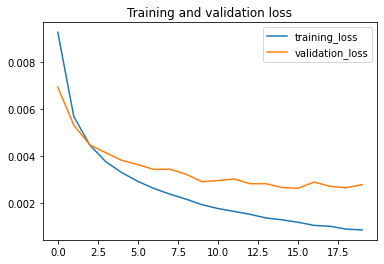

In [ ]:
plot_helper("Training and validation loss",training_loss = training_loss_history,validation_loss = val_loss_history)

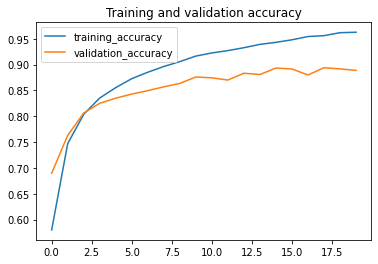

In [ ]:
plot_helper("Training and validation accuracy",training_accuracy = training_acc_history,validation_accuracy = val_acc_history)

#### CIFAR predictions visualizations

### Training on MNIST

In [ ]:
def get_MNIST_resnet(batch_size = BATCH_SIZE):
    mnist = torchvision.datasets.MNIST(download=True, train=True, root=".").train_data.float()
    
    data_transform = transforms.Compose([ transforms.Resize((224, 224)),
                                         transforms.ToTensor(), 
                                         transforms.Normalize((mnist.mean()/255,), (mnist.std()/255,))])

    train_loader = DataLoader(torchvision.datasets.MNIST(download=True, root=".", transform=data_transform, train=True),
                              batch_size=BATCH_SIZE, shuffle=True)

    val_loader = DataLoader(torchvision.datasets.MNIST(download=True, root=".", transform=data_transform, train=False),
                            batch_size=BATCH_SIZE, shuffle=False)
    return train_loader, val_loader
    
mnist_train,mnist_val = get_MNIST_resnet()

In [ ]:
resnet = models.resnet34(num_classes=10).to(device)


In [ ]:
# tweek model slightly to work with MNIST (change the first convolution so it expects a gray scale image)
resnet.conv1 = torch.nn.Conv2d(1, 64, 
            kernel_size=(7, 7), 
            stride=(2, 2), 
            padding=(3, 3), bias=False).to(device)
# First we define the optimizer
optimizer = torch.optim.Adam(resnet.parameters(), lr=3e-4)
# select path to save best model 
save_path = base_path + "Resnet/best_MNIST"
#
training_loss_history,training_acc_history,val_loss_history,val_acc_history = train(resnet,optimizer,mnist_train,mnist_val,num_epochs=NUM_EPOCHS,save_path=save_path,evaluate_every_epoch=1)

Training starting ... 

Epoch number 1 --------------------------------------------------
 Training Loss = 0.0008365559624508023, Training Accuracy = 96.74% 
performing validation : 
 validation  loss = 0.0002590863441582769, validation accuracy = 99.02% 
Saving best model so far
Epoch number 2 --------------------------------------------------
 Training Loss = 0.00027115436387248337, Training Accuracy = 98.95% 
performing validation : 
 validation  loss = 0.00017633804236538708, validation accuracy = 99.26% 
Saving best model so far
Epoch number 3 --------------------------------------------------
 Training Loss = 0.00021532687242142856, Training Accuracy = 99.11% 
performing validation : 
 validation  loss = 0.00016875336586963385, validation accuracy = 99.31% 
Saving best model so far
Epoch number 4 --------------------------------------------------
 Training Loss = 0.00017521427071187645, Training Accuracy = 99.30% 
performing validation : 
 validation  loss = 0.0001608514867257326

In [ ]:
print(training_loss_history)
print(training_acc_history)
print(val_loss_history)
print(val_acc_history)
np.save(base_path + "Resnet/MNIST_train_loss.npy",np.array(training_loss_history))
np.save(base_path + "Resnet/MNIST_train_acc.npy",np.array(training_acc_history))
np.save(base_path + "Resnet/MNIST_val_loss.npy",np.array(val_loss_history))
np.save(base_path + "Resnet/MNIST_val_acc.npy",np.array(val_acc_history))

[tensor(0.0008, grad_fn=<ToCopyBackward0>), tensor(0.0003, grad_fn=<ToCopyBackward0>), tensor(0.0002, grad_fn=<ToCopyBackward0>), tensor(0.0002, grad_fn=<ToCopyBackward0>), tensor(0.0002, grad_fn=<ToCopyBackward0>), tensor(0.0001, grad_fn=<ToCopyBackward0>), tensor(0.0001, grad_fn=<ToCopyBackward0>), tensor(0.0001, grad_fn=<ToCopyBackward0>), tensor(9.7388e-05, grad_fn=<ToCopyBackward0>), tensor(8.5777e-05, grad_fn=<ToCopyBackward0>)]
[tensor(0.9674), tensor(0.9895), tensor(0.9911), tensor(0.9930), tensor(0.9941), tensor(0.9938), tensor(0.9945), tensor(0.9952), tensor(0.9961), tensor(0.9966)]
[tensor(0.0003), tensor(0.0002), tensor(0.0002), tensor(0.0002), tensor(0.0002), tensor(0.0002), tensor(0.0001), tensor(0.0002), tensor(0.0001), tensor(0.0002)]
[tensor(0.9902), tensor(0.9926), tensor(0.9931), tensor(0.9935), tensor(0.9942), tensor(0.9926), tensor(0.9938), tensor(0.9924), tensor(0.9948), tensor(0.9941)]


In [ ]:
# import numpy as np
# import torch
# def thing(array):
#   arr=[]
#   for i in range(len(array)):
#     arr.append(torch.tensor(array[i]))
#   return arr
# base_path = "/content/drive/MyDrive/computer vision project/"
# training_loss_history = thing ( [0.0003,0.0002,0.0002,0.0002,0.0001,0.0001,0.0001,9.7388e-05,8.5777e-05] )
# training_acc_history = thing( [0.9674, 0.9895,0.9911,0.9930,0.9941,0.9938,0.9945,0.9952,0.9961,0.9966] )
# val_loss_history = thing([0.0003, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0001, 0.0002, 0.0001, 0.0002])
# val_acc_history = thing( [0.9902, 0.9926, 0.9931, 0.9935, 0.9942, 0.9926, 0.9938, 0.9924, 0.9948, 0.9941] )
# np.save(base_path + "Resnet/MNIST_train_loss.npy",np.array(training_loss_history))
# np.save(base_path + "Resnet/MNIST_train_acc.npy",np.array(training_acc_history))
# np.save(base_path + "Resnet/MNIST_val_loss.npy",np.array(val_loss_history))
# np.save(base_path + "Resnet/MNIST_val_acc.npy",np.array(val_acc_history))

#### MNIST training Visualization

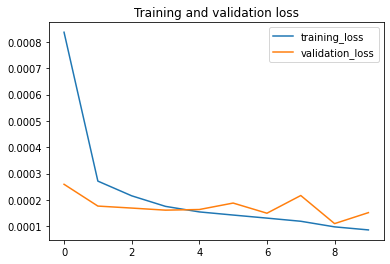

In [ ]:
plot_helper("Training and validation loss",training_loss = training_loss_history,validation_loss = val_loss_history)

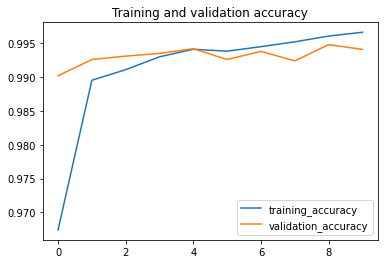

In [ ]:
plot_helper("Training and validation accuracy",training_accuracy = training_acc_history,validation_accuracy = val_acc_history)

#### MNIST predictions visualizations

## GoogleNet training

### Training on MNIST

In [25]:
def get_MNIST_googlenet(batch_size = BATCH_SIZE):
    mnist = torchvision.datasets.MNIST(download=True, train=True, root=".").train_data.float()
    
    data_transform = transforms.Compose([ transforms.Resize((224, 224)),
                                         transforms.ToTensor(), 
                                         transforms.Normalize((mnist.mean()/255,), (mnist.std()/255,))])

    train_loader = DataLoader(torchvision.datasets.MNIST(download=True, root=".", transform=data_transform, train=True),
                              batch_size=BATCH_SIZE, shuffle=True)

    val_loader = DataLoader(torchvision.datasets.MNIST(download=True, root=".", transform=data_transform, train=False),
                            batch_size=BATCH_SIZE, shuffle=False)
    return train_loader, val_loader
    
mnist_train,mnist_val = get_MNIST_googlenet()

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


In [26]:
googlenet = models.googlenet(num_classes= 10)
googlenet.conv1 = nn.Sequential(
    torch.nn.Conv2d(1, 64, 
            kernel_size=(7, 7), 
            stride=(2, 2), 
            padding=(3, 3), bias=False),
            torch.nn.BatchNorm2d(64,eps=0.001)
)
googlenet = googlenet.to(device)

/usr/local/lib/python3.7/dist-packages/torchvision/models/googlenet.py:50: FutureWarning: The default weight initialization of GoogleNet will be changed in future releases of torchvision. If you wish to keep the old behavior (which leads to long initialization times due to scipy/scipy#11299), please set init_weights=True.
  FutureWarning,


In [27]:
# First we define the optimizer
optimizer = torch.optim.Adam(googlenet.parameters(), lr=3e-4)
# select path to save best model 
save_path = base_path + "Googlenet/best_MNIST"
#
training_loss_history,training_acc_history,val_loss_history,val_acc_history = train(googlenet,optimizer,mnist_train,mnist_val,num_epochs=NUM_EPOCHS,save_path=save_path,evaluate_every_epoch=1,is_googleNet=True)

Training starting ... 

Epoch number 1 --------------------------------------------------


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


 Training Loss = 0.0015734251355752349, Training Accuracy = 96.83% 
performing validation : 
 validation  loss = 8.447791515209246e-07, validation accuracy = 98.93% 
Saving best model so far
Epoch number 2 --------------------------------------------------
 Training Loss = 0.000491878017783165, Training Accuracy = 98.87% 
performing validation : 
 validation  loss = 1.0138396078218648e-07, validation accuracy = 99.23% 
Saving best model so far
Epoch number 3 --------------------------------------------------
 Training Loss = 0.00039121348527260125, Training Accuracy = 99.03% 
performing validation : 
 validation  loss = 5.27629197222268e-07, validation accuracy = 99.05% 
Epoch number 4 --------------------------------------------------
 Training Loss = 0.00033850508043542504, Training Accuracy = 99.20% 
performing validation : 
 validation  loss = 3.131744819029336e-08, validation accuracy = 99.45% 
Saving best model so far
Epoch number 5 -----------------------------------------------

In [28]:
print(training_loss_history)
print(training_acc_history)
print(val_loss_history)
print(val_acc_history)
np.save(base_path + "Googlenet/MNIST_train_loss.npy",np.array(training_loss_history))
np.save(base_path + "Googlenet/MNIST_train_acc.npy",np.array(training_acc_history))
np.save(base_path + "Googlenet/MNIST_val_loss.npy",np.array(val_loss_history))
np.save(base_path + "Googlenet/MNIST_val_acc.npy",np.array(val_acc_history))

[tensor(0.0016), tensor(0.0005), tensor(0.0004), tensor(0.0003), tensor(0.0003), tensor(0.0003), tensor(0.0002), tensor(0.0002), tensor(0.0002), tensor(0.0002)]
[tensor(0.9683), tensor(0.9887), tensor(0.9903), tensor(0.9920), tensor(0.9935), tensor(0.9937), tensor(0.9946), tensor(0.9948), tensor(0.9956), tensor(0.9954)]
[tensor(8.4478e-07), tensor(1.0138e-07), tensor(5.2763e-07), tensor(3.1317e-08), tensor(2.5915e-08), tensor(3.3377e-08), tensor(1.5116e-08), tensor(4.0745e-08), tensor(2.9615e-08), tensor(1.0117e-08)]
[tensor(0.9893), tensor(0.9923), tensor(0.9905), tensor(0.9945), tensor(0.9937), tensor(0.9933), tensor(0.9941), tensor(0.9934), tensor(0.9908), tensor(0.9941)]


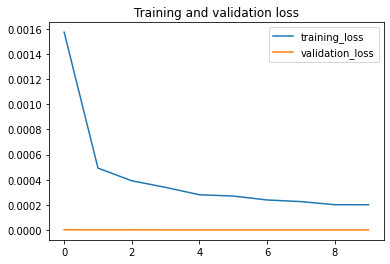

In [29]:
plot_helper("Training and validation loss",training_loss = training_loss_history,validation_loss = val_loss_history)

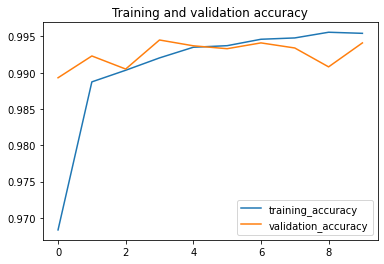

In [30]:
plot_helper("Training and validation accuracy",training_accuracy = training_acc_history,validation_accuracy = val_acc_history)